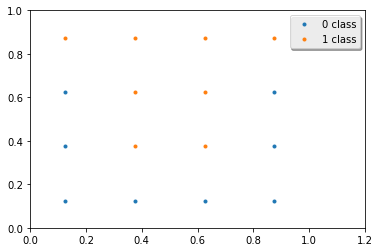

points:
[[[ 0.875  0.875]
  [ 0.625  0.875]
  [ 0.375  0.875]
  [ 0.125  0.875]]

 [[ 0.875  0.625]
  [ 0.625  0.625]
  [ 0.375  0.625]
  [ 0.125  0.625]]

 [[ 0.875  0.375]
  [ 0.625  0.375]
  [ 0.375  0.375]
  [ 0.125  0.375]]

 [[ 0.875  0.125]
  [ 0.625  0.125]
  [ 0.375  0.125]
  [ 0.125  0.125]]]
-------------------------
classes:
[[1 1 1 1]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]]


In [15]:
#dataset1

import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np


def load_data(y_train, show=False):
    if y_train.shape != (4, 4):
        raise TypeError("Shape can be only (4,4)")

    train_size = int(y_train.shape[0] * y_train.shape[1])
    x_train = np.zeros(train_size * 2)

    graph_pts_zero_x = np.zeros(8)
    graph_pts_zero_y = np.zeros(8)
    graph_pts_one_x = np.zeros(8)
    graph_pts_one_y = np.zeros(8)

    i = 0
    one_i = 0
    zero_i = 0
    for y in np.arange(0,y_train.shape[0], 1, dtype=int):
        for x in np.arange(0,y_train.shape[1], 1, dtype=int):
            if y_train[y_train.shape[0] - y - 1][x] == 1:
                graph_pts_one_x[one_i] = x/ 4.0 + 0.125
                graph_pts_one_y[one_i] =  y / 4.0+0.125
                one_i += 1
            elif y_train[y_train.shape[0] - y - 1][x] == 0:
                graph_pts_zero_x[zero_i] =  x / 4.0 + 0.125
                graph_pts_zero_y[zero_i] = y / 4.0+0.125
                zero_i += 1

            x_train[i] = y / 4.0+0.125
            x_train[i + 1] = x / 4.0+0.125
            i += 2
            
    plt.plot(graph_pts_zero_x, graph_pts_zero_y, '.')
    plt.plot(graph_pts_one_x, graph_pts_one_y, '.')
    plt.xlim(0, 1.2)
    plt.ylim(0, 1)
    
    plt.legend(('0 class', '1 class'),loc='upper right', shadow=True)
    

    if show:
        plt.show()
    plt.close()

    return (x_train[::-1].reshape(train_size, 2), y_train.reshape(train_size, 1))


#---------------------------

y_train=np.array([[1,1,1,1],
                  [0,1,1,0],
                  [0,1,1,0],
                  [0,0,0,0]])

(x_train,y_train)=load_data(y_train,show=True)

print("points:")
print(x_train.reshape(4,4,2))

print("-------------------------")

print("classes:")
print(y_train.reshape(4,4))

In [14]:
#dataset2


import numpy as np


def func(x1, x2, x3, x4, x5):
    """
    ~x1 & ~x2 & x3 & ~x4 & x5  |
    x1 & ~x2 & ~x3 & ~x4 & x5  |
    x1 & ~x2 & ~x3 & x4 & x5   |
    x1 & ~x2 & x3 & x4 & x5    |
    x1 & x2 & ~x3 & ~x4 & ~x5
    
    """
    return (not x1) & (not x2) & x3 & (not x4) & x5 | x1 & (not x2) & (not x3) & (not x4) & x5 \
           | x1 & (not x2) & (not x3) & x4 & x5 \
           | x1 & (not x2) & x3 & x4 & x5 | x1 & x2 & (not x3) & (not x4) & (not x5)


def load_data():
    x_train = np.empty(0)
    y_train = np.empty(0)
    for x1 in range(0, 2):
        for x2 in range(0, 2):
            for x3 in range(0, 2):
                for x4 in range(0, 2):
                    for x5 in range(0, 2):
                        x_train = np.append(x_train, np.array([x1, x2, x3, x4, x5]))
                        y_train = np.append(y_train, func(x1, x2, x3, x4, x5))

    return (x_train.reshape(32, 5), y_train)


#---------------------------

x_train,y_train=load_data()

print("СДНФ:")

print(func.__doc__)

print("Table of truth:")

for i in range(0,32):
    print(x_train[i],y_train[i])

СДНФ:

    ~x1 & ~x2 & x3 & ~x4 & x5  |
    x1 & ~x2 & ~x3 & ~x4 & x5  |
    x1 & ~x2 & ~x3 & x4 & x5   |
    x1 & ~x2 & x3 & x4 & x5    |
    x1 & x2 & ~x3 & ~x4 & ~x5
    
    
Table of truth:
(array([ 0.,  0.,  0.,  0.,  0.]), 0.0)
(array([ 0.,  0.,  0.,  0.,  1.]), 0.0)
(array([ 0.,  0.,  0.,  1.,  0.]), 0.0)
(array([ 0.,  0.,  0.,  1.,  1.]), 0.0)
(array([ 0.,  0.,  1.,  0.,  0.]), 0.0)
(array([ 0.,  0.,  1.,  0.,  1.]), 1.0)
(array([ 0.,  0.,  1.,  1.,  0.]), 0.0)
(array([ 0.,  0.,  1.,  1.,  1.]), 0.0)
(array([ 0.,  1.,  0.,  0.,  0.]), 0.0)
(array([ 0.,  1.,  0.,  0.,  1.]), 0.0)
(array([ 0.,  1.,  0.,  1.,  0.]), 0.0)
(array([ 0.,  1.,  0.,  1.,  1.]), 0.0)
(array([ 0.,  1.,  1.,  0.,  0.]), 0.0)
(array([ 0.,  1.,  1.,  0.,  1.]), 0.0)
(array([ 0.,  1.,  1.,  1.,  0.]), 0.0)
(array([ 0.,  1.,  1.,  1.,  1.]), 0.0)
(array([ 1.,  0.,  0.,  0.,  0.]), 0.0)
(array([ 1.,  0.,  0.,  0.,  1.]), 1.0)
(array([ 1.,  0.,  0.,  1.,  0.]), 0.0)
(array([ 1.,  0.,  0.,  1.,  1.]), 1.0)
(arra

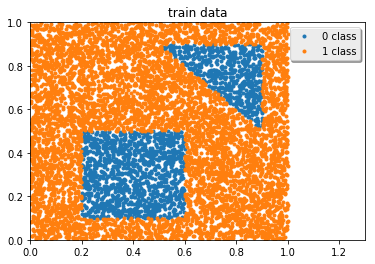

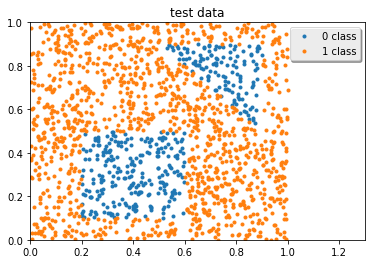

In [16]:
#dataset3

#necceassary for import local packages in jupyter
import sys
sys.path.append("../..") 

import matplotlib.pyplot as plt
import numpy as np


import LABS.ZeroLab.D_DivIntoNClasses as dataset4


def load_data(train_size=2000, show=False):
    test_size = int(train_size * 0.2)

    x_train = np.empty(0)
    y_train = np.empty(0)

    x_test = np.empty(0)
    y_test = np.empty(0)

    x_train_for_plt = np.empty(0)
    x_train_missed_for_plt = np.empty(0)

    x_test_for_plt = np.empty(0)
    x_test_missed_for_plt = np.empty(0)

    for i in range(train_size + test_size):

        x = np.random.random()
        y = np.random.random()

        if i < train_size:
            x_train = np.append(x_train, (x, y))
        else:
            x_test = np.append(x_test, (x, y))

        if dataset4.isRect(x, y, xMin=0.2, xMax=0.6, yMin=0.1, yMax=0.5) or \
                dataset4.isTriangle(x, y, x1=0.5, x2=0.9, x3=0.9, y1=0.9, y2=0.5, y3=0.9):
            if i < train_size:
                x_train_for_plt = np.append(x_train_for_plt, (x, y))
                y_train = np.append(y_train, 1)
            else:
                x_test_for_plt = np.append(x_test_for_plt, (x, y))
                y_test = np.append(y_test, 1)
        else:
            if i < train_size:
                x_train_missed_for_plt = np.append(x_train_missed_for_plt, (x, y))
                y_train = np.append(y_train, 0)
            else:
                x_test_missed_for_plt = np.append(x_test_missed_for_plt, (x, y))
                y_test = np.append(y_test, 0)

    # Reshaping
    x_train.shape = (train_size, 2)
    x_test.shape = (test_size, 2)

    x_train_for_plt.shape = (int(x_train_for_plt.size / 2), 2)
    x_train_missed_for_plt.shape = (int(x_train_missed_for_plt.size / 2), 2)

    x_test_for_plt.shape = (int(x_test_for_plt.size / 2), 2)
    x_test_missed_for_plt.shape = (int(x_test_missed_for_plt.size / 2), 2)

    # Plotting train
    plt.xlim(0, 1.3)
    plt.ylim(0, 1)
    plt.title("train data")
    plt.plot(x_train_for_plt.transpose()[0], x_train_for_plt.transpose()[1], '.')
    plt.plot(x_train_missed_for_plt.transpose()[0], x_train_missed_for_plt.transpose()[1], '.')
    
    plt.legend(('0 class','1 class'),loc='upper right', shadow=True)
    
    
    if show:
        plt.show()

    plt.close()

    # Plotting test
    plt.xlim(0, 1.3)
    plt.ylim(0, 1)
    plt.title("test data")
    plt.plot(x_test_for_plt.transpose()[0], x_test_for_plt.transpose()[1], '.')
    plt.plot(x_test_missed_for_plt.transpose()[0], x_test_missed_for_plt.transpose()[1], '.')

    plt.legend(('0 class','1 class'),loc='upper right', shadow=True)
    
    if show:
        plt.show()

    return (x_train, y_train), (x_test, y_test)

#---------------------------

(x_train, y_train), (x_test, y_test) = load_data(train_size=8000,show=True)

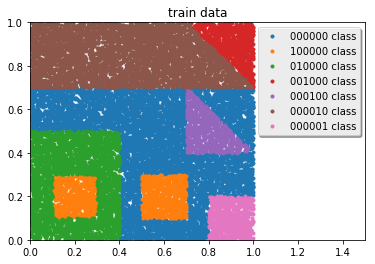

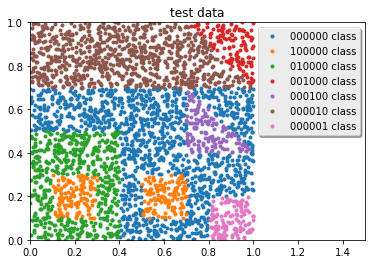

In [17]:
#dataset4


import matplotlib.pyplot as plt
import math as m
import numpy as np


def isElipse(x, y, xCenter, yCenter, radVert, radHor):
    if not m.pow((x - xCenter) / radHor, 2) + m.pow((y - yCenter) / radVert, 2) <= 1:
        return False
    return True


def isRect(x, y, xMin, yMin, xMax, yMax):
    if (xMin < x and x < xMax) and (yMin < y and y < yMax):
        return True
    return False


def isTriangle(x, y, x1, y1, x2, y2, x3, y3):
    sign1 = (x1 - x) * (y2 - y1) - (x2 - x1) * (y1 - y)
    sign2 = (x2 - x) * (y3 - y2) - (x3 - x2) * (y2 - y)
    sign3 = (x3 - x) * (y1 - y3) - (x1 - x3) * (y3 - y)

    # Normalization
    try:
        sign1 /= m.fabs(sign1)
        sign2 /= m.fabs(sign2)
        sign3 /= m.fabs(sign3)
    except ZeroDivisionError:
        return False

    if int(sign1) == int(sign2) == int(sign3):
        return True

    return False


def load_data(train_size=4000, show=False):
    test_size = int(train_size * 0.2)

    x_train = np.empty(0)
    y_train = np.empty(0)

    x_test = np.empty(0)
    y_test = np.empty(0)

    train_plt_points0 = np.empty(0)
    train_plt_points1 = np.empty(0)
    train_plt_points2 = np.empty(0)
    train_plt_points3 = np.empty(0)
    train_plt_points4 = np.empty(0)
    train_plt_points5 = np.empty(0)
    train_plt_points6 = np.empty(0)

    test_plt_points0 = np.empty(0)
    test_plt_points1 = np.empty(0)
    test_plt_points2 = np.empty(0)
    test_plt_points3 = np.empty(0)
    test_plt_points4 = np.empty(0)
    test_plt_points5 = np.empty(0)
    test_plt_points6 = np.empty(0)

    for i in range(0, train_size + test_size):
        x = np.random.random()
        y = np.random.random()

        # First class
        if isRect(x, y, xMin=0.1, yMin=0.1, xMax=0.3, yMax=0.3) or \
                isRect(x, y, xMin=0.5, yMin=0.1, xMax=0.7, yMax=0.3):

            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([1, 0, 0, 0, 0, 0]))
                train_plt_points1 = np.append(train_plt_points1, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([1, 0, 0, 0, 0, 0]))
                test_plt_points1 = np.append(test_plt_points1, (x, y))

        # Second class
        elif isRect(x, y, xMin=0.0, yMin=0.0, xMax=0.4, yMax=0.5):

            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 1, 0, 0, 0, 0]))
                train_plt_points2 = np.append(train_plt_points2, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 1, 0, 0, 0, 0]))
                test_plt_points2 = np.append(test_plt_points2, (x, y))

        # Third class
        elif isTriangle(x, y, x1=1.0, y1=1.0, x2=1.0, y2=0.70, x3=0.7, y3=1.0):

            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 1, 0, 0, 0]))
                train_plt_points3 = np.append(train_plt_points3, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 1, 0, 0, 0]))
                test_plt_points3 = np.append(test_plt_points3, (x, y))

        # Fourth class
        elif isTriangle(x, y, x1=0.7, y1=0.4, x2=0.7, y2=0.7, x3=1.0, y3=0.4):

            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 1, 0, 0]))
                train_plt_points4 = np.append(train_plt_points4, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 1, 0, 0]))
                test_plt_points4 = np.append(test_plt_points4, (x, y))

        # Fifth class
        elif isRect(x, y, xMin=0.0, yMin=0.7, xMax=1.0, yMax=1.0):

            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 1, 0]))
                train_plt_points5 = np.append(train_plt_points5, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 1, 0]))
                test_plt_points5 = np.append(test_plt_points5, (x, y))

        # Sixth class
        elif isRect(x, y, xMin=0.8, yMin=0.0, xMax=1.0, yMax=0.2):

            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 0, 1]))
                train_plt_points6 = np.append(train_plt_points6, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 0, 1]))
                test_plt_points6 = np.append(test_plt_points6, (x, y))

        # Seventh class
        else:

            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 0, 0]))
                train_plt_points0 = np.append(train_plt_points0, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_test = np.append(y_test, np.array([0, 0, 0, 0, 0, 0]))
                test_plt_points0 = np.append(test_plt_points0, (x, y))

    # reshaping
    x_train.shape = (int(x_train.size / 2), 2)
    y_train.shape = (int(y_train.size / 6), 6)
    train_plt_points0.shape = (int(train_plt_points0.size / 2), 2)
    train_plt_points1.shape = (int(train_plt_points1.size / 2), 2)
    train_plt_points2.shape = (int(train_plt_points2.size / 2), 2)
    train_plt_points3.shape = (int(train_plt_points3.size / 2), 2)
    train_plt_points4.shape = (int(train_plt_points4.size / 2), 2)
    train_plt_points5.shape = (int(train_plt_points5.size / 2), 2)
    train_plt_points6.shape = (int(train_plt_points6.size / 2), 2)

    x_test.shape = (int(x_test.size / 2), 2)
    y_test.shape = (int(y_test.size / 6), 6)
    test_plt_points0.shape = (int(test_plt_points0.size / 2), 2)
    test_plt_points1.shape = (int(test_plt_points1.size / 2), 2)
    test_plt_points2.shape = (int(test_plt_points2.size / 2), 2)
    test_plt_points3.shape = (int(test_plt_points3.size / 2), 2)
    test_plt_points4.shape = (int(test_plt_points4.size / 2), 2)
    test_plt_points5.shape = (int(test_plt_points5.size / 2), 2)
    test_plt_points6.shape = (int(test_plt_points6.size / 2), 2)

    # plotting
    plt.xlim(0, 1.5)
    plt.ylim(0, 1)
    plt.title("train data")
    plt.plot(train_plt_points0.transpose()[0], train_plt_points0.transpose()[1], '.')
    plt.plot(train_plt_points1.transpose()[0], train_plt_points1.transpose()[1], '.')
    plt.plot(train_plt_points2.transpose()[0], train_plt_points2.transpose()[1], '.')
    plt.plot(train_plt_points3.transpose()[0], train_plt_points3.transpose()[1], '.')
    plt.plot(train_plt_points4.transpose()[0], train_plt_points4.transpose()[1], '.')
    plt.plot(train_plt_points5.transpose()[0], train_plt_points5.transpose()[1], '.')
    plt.plot(train_plt_points6.transpose()[0], train_plt_points6.transpose()[1], '.')
    
    plt.legend(('000000 class', '100000 class', '010000 class','001000 class','000100 class','000010 class',
                '000001 class'),loc='upper right', shadow=True)
     

    if show:
        plt.show()

    plt.close()

    # plotting
    plt.xlim(0, 1.5)
    plt.ylim(0, 1)
    plt.title("test data")
    plt.plot(test_plt_points0.transpose()[0], test_plt_points0.transpose()[1], '.')
    plt.plot(test_plt_points1.transpose()[0], test_plt_points1.transpose()[1], '.')
    plt.plot(test_plt_points2.transpose()[0], test_plt_points2.transpose()[1], '.')
    plt.plot(test_plt_points3.transpose()[0], test_plt_points3.transpose()[1], '.')
    plt.plot(test_plt_points4.transpose()[0], test_plt_points4.transpose()[1], '.')
    plt.plot(test_plt_points5.transpose()[0], test_plt_points5.transpose()[1], '.')
    plt.plot(test_plt_points6.transpose()[0], test_plt_points6.transpose()[1], '.')

    plt.legend(('000000 class', '100000 class', '010000 class','001000 class','000100 class','000010 class',
                '000001 class'),loc='upper right', shadow=True)
    
    
    if show:
        plt.show()

    return (x_train, y_train), (x_test, y_test)


#---------------------------

(x_train, y_train), (x_test, y_test)=load_data(train_size=16000,show=True)


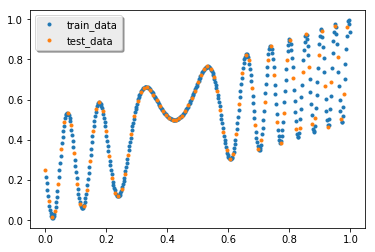

In [18]:
#dataset5

import matplotlib.pyplot as plt
import math as m
import numpy as np


def function(x):
    x = x * 100
    return 0.25 + x / 200.0 + 0.25 * m.sin(2.0 / 3.0 * x * m.sin(x / 50.0 + 3.0 * m.pi / 2.0))


def load_data(train_size=200,show=False):
    
    test_size = int(train_size*0.2)
    
    h = 1.0 / float(train_size+test_size)
    
    
    x_train = np.empty(0)
    y_train = np.empty(0)
    
    x_test = np.empty(0)
    y_test = np.empty(0)
    
    i = 0
    for x in np.arange(0.0,1.0,h,dtype = float):
        if i % 5 == 0:
            x_test = np.append(x_test, x)
            y_test = np.append(y_test,function(x))
        else:
            x_train = np.append(x_train,x)
            y_train = np.append(y_train,function(x))

        i += 1
        
    
    plt.plot(x_train,y_train,'.')
    plt.plot(x_test,y_test,'.')
    plt.legend(('train_data','test_data'),loc='upper left', shadow=True)
    if show:
        plt.show()
        
    return (x_train,y_train),(x_test,y_test)


#---------------------------

(x_train,y_train),(x_test,y_test) = load_data(train_size=400,show=True)



In [14]:
#dataset8
#necceassary for import local packages in jupyter
import sys
sys.path.append("../..") 


import keras
import numpy as np

from ADDITIONAL.IMAGE_CHANGER import show_image_by_pxs,save_image_by_pxs


def load_data():
    np.random.seed(42)

    
    #loading data from keras datasets
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    
    #reshaping
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    
    #normalizations
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    return (x_train, y_train), (x_test, y_test)


#---------------------------

(x_train, y_train), (x_test, y_test) = load_data()


print(y_train[0])


#examples of showing or saving images from x_train(can be uncommented ) 

show_image_by_pxs(pxs = (x_train[0]*255).reshape(28,28))

#save_image_by_pxs(pxs=(x_train[0] * 255).reshape(28, 28), output_path=str(int(y_train[0])) + ".png")


5
